### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
data.isnull().sum().sort_values(ascending=False)
#check missing values

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#car was missing WAY to many values so I dropped the whole thing
dfcleaned = data.drop(columns=['car'])
#drop the remaining nan
dfcleaned = df_cleaned.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [10]:
acceptrate = dfcleaned['Y'].mean() #math
print(f"Acceptance Rate: {acceptrate:.2%}")

Acceptance Rate: 56.93%


5. Use a bar plot to visualize the `coupon` column.

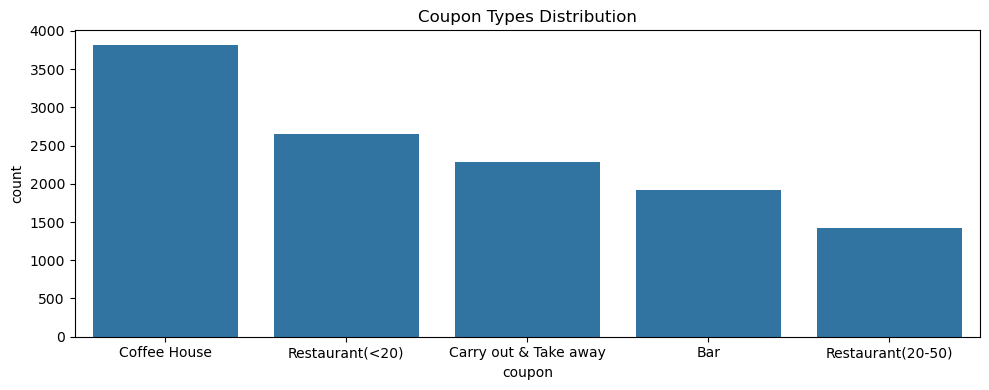

In [21]:
plt.figure(figsize=(10, 4)) #size of graph
sns.countplot(data=dfcleaned, x='coupon', order=dfcleaned['coupon'].value_counts().index) #bargraph, take cleaned data, x is coupons, order based on coupon amount
plt.title("Coupon Types Distribution")
plt.tight_layout() #widen the graph for better visuals with labels
plt.show()

6. Use a histogram to visualize the temperature column.

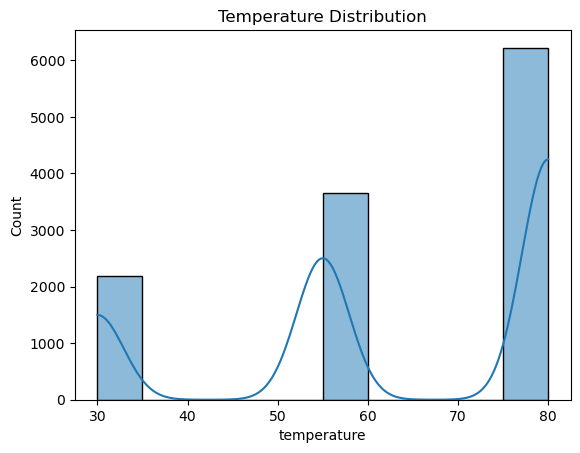

In [19]:
sns.histplot(data=dfcleaned, x='temperature', bins=10, kde=True)
plt.title("Temperature Distribution")
plt.show()

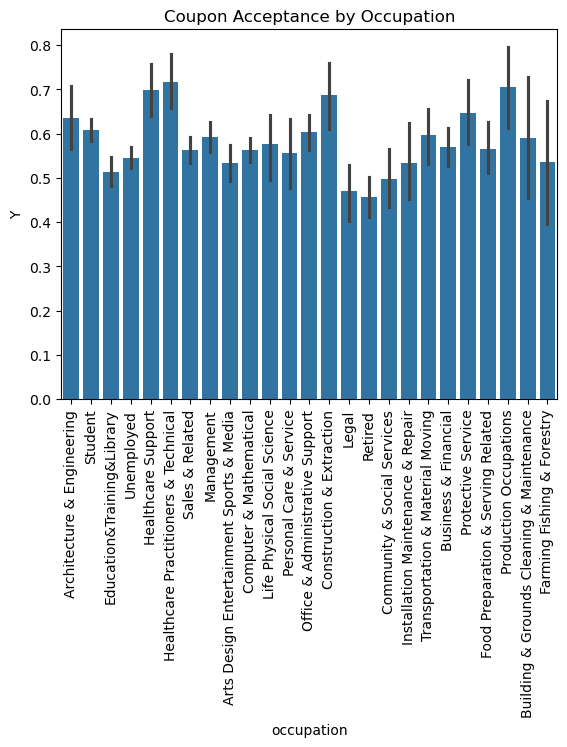

In [75]:
sns.barplot(data=dfcleaned, x='occupation', y='Y')
plt.xticks(rotation=90)
plt.title('Coupon Acceptance by Occupation')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [62]:
bardf = dfcleaned[dfcleaned['coupon'] == 'Bar'].copy()
#create a copy to mainly work with

2. What proportion of bar coupons were accepted?


In [31]:
bar_acceptrate = bardf['Y'].mean()
print(f"Bar Coupon Acceptance Rate: {bar_acceptrate:.2%}")

Bar Coupon Acceptance Rate: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [56]:
#edit the copy to make it cleaner on a scale/graph
bardf['Bar_freq'] = bardf['Bar'].map({'never': 0, 'less than 1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9})

#add new column to flag frequents
bardf.loc[:, 'frequent_bar_goer'] = bardf['Bar_freq'] > 3
#compare rates
accept_rate_by_freq = bardf.groupby('frequent_bar_goer')['Y'].mean()
print(accept_rate_by_freq)

frequent_bar_goer
False    0.372674
True     0.761658
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
#make age a number
def age_to_numeric(age):
    if age == 'below21': return 20
    if age == '50plus': return 51
    return int(age.split(' ')[0])

#add function and store it in the copy
bardf.loc[:, 'age_num'] = bardf['age'].apply(age_to_numeric)

#filter for age and frequency
age_freq = (bardf['Bar_freq'] > 1) & (bardf['age_num'] > 25)

print("Acceptance Rate (Freq >1 & Age >25):", bardf[age_freq]['Y'].mean())
print("Others:", bardf[~age_freq]['Y'].mean())

Acceptance Rate (Freq >1 & Age >25): 0.6898263027295285
Others: 0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [42]:
#define the filter
conditions = (
    (bardf['Bar_freq'] > 1) & #more than 1 a month
    (bardf['passanger'] != 'Kid(s)') & #passangers isnot kids
    (~bardf['occupation'].isin(['Farming Fishing & Forestry']))) #dissinclude things in FF&F

print("Accpetance Rate:", bardf[conditions]['Y'].mean())

Accpetance Rate: 0.7094339622641509


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [61]:
conditionswindow = (
    (bardf['Bar_freq'] > 1) &
    (bardf['passanger'] != 'Kid(s)') & #no kids
    (bardf['maritalStatus'] != 'Widowed')) #not widowed

month30 = (
    (bardf['Bar_freq'] > 1) &
    (bardf['age_num'] < 30)) #age, with the previous age fixes

cheapless50 = (
    (bardf['RestaurantLessThan20'] == '4~8') &
    (bardf['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))) #giant spam becuase incom is a string

print("Group A:", bardf[conditionswindow]['Y'].mean())
print("Group B:", bardf[month30]['Y'].mean())
print("Group C:", bardf[cheapless50]['Y'].mean())

Group A: 0.7094339622641509
Group B: 0.7195121951219512
Group C: 0.41899441340782123


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Based on these observations, we can hypothesize that drivers who are more socially active, 
#and not constrained by things like age or family are more likely to accept bar coupons.
#Drivers who go to bars more than once a month were significantly more likely to accept the coupon.
#They were even higher with frequents older than 25, who had no children or whos occupation was not in farming, fishing, or forestry
#These patterns suggest we should offer coupons to young and social drivers without kids.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [63]:
#Create a new DataFrame that contains just the bar coupons.
coffeedf = dfcleaned[dfcleaned['coupon'] == 'Coffee House'].copy()
#create a new copy to work with

In [65]:
#What proportion of bar coupons were accepted?
coffee_acceptrate = coffeedf['Y'].mean()
print(f"Coffee House Coupon Acceptance Rate: {coffee_acceptrate:.2%}")

Coffee House Coupon Acceptance Rate: 49.63%


In [66]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
#copy of previous code
#edit the copy to make it cleaner on a scale/graph
coffeedf['Coffee_House_freq'] = coffeedf['CoffeeHouse'].map({'never': 0, 'less than 1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9})

#add new column to flag frequents
coffeedf.loc[:, 'frequent_coffee_house_goer'] = coffeedf['Coffee_House_freq'] > 3
#compare rates
accept_coffee_rate_by_freq = coffeedf.groupby('frequent_coffee_house_goer')['Y'].mean()
print(accept_coffee_rate_by_freq)

frequent_coffee_house_goer
False    0.445905
True     0.672556
Name: Y, dtype: float64


In [69]:
#Compare the acceptance rate between drivers who go to a coffee house more than once a month 
#and are over the age of 25 to the all others. Is there a difference?
#copy old code
def age_to_numeric(age):
    if age == 'below21': return 20
    if age == '50plus': return 51
    return int(age.split(' ')[0])

#add function and store it in the copy
coffeedf.loc[:, 'age_num'] = coffeedf['age'].apply(age_to_numeric)

#filter for age and frequency
coffee_age_freq = (coffeedf['Coffee_House_freq'] > 1) & (coffeedf['age_num'] > 25)

print("Acceptance Rate (Freq >1 & Age >25):", coffeedf[coffee_age_freq]['Y'].mean())
print("Others:", coffeedf[~coffee_age_freq]['Y'].mean())

Acceptance Rate (Freq >1 & Age >25): 0.6395522388059701
Others: 0.41882067851373184


In [70]:
#compare the acceptance rate between drivers who go to coffee houses more than once a month and 
#had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
#copy old code
#define the filter
cofconditions = (
    (coffeedf['Coffee_House_freq'] > 1) & #more than 1 a month
    (coffeedf['passanger'] != 'Kid(s)') & #passangers isnot kids
    (~coffeedf['occupation'].isin(['Farming Fishing & Forestry']))) #dissinclude things in FF&F

print("Accpetance Rate:", coffeedf[cofconditions]['Y'].mean())

Accpetance Rate: 0.6596710153148043


In [71]:
#Compare the acceptance rates between those drivers who:
#go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed OR
#go to coffee houses more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cofconditionswindow = (
    (coffeedf['Coffee_House_freq'] > 1) &
    (coffeedf['passanger'] != 'Kid(s)') & #no kids
    (coffeedf['maritalStatus'] != 'Widowed')) #not widowed

cofmonth30 = (
    (coffeedf['Coffee_House_freq'] > 1) &
    (coffeedf['age_num'] < 30)) #age, with the previous age fixes

cofcheapless50 = (
    (coffeedf['RestaurantLessThan20'] == '4~8') &
    (coffeedf['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))) #giant spam becuase incom is a string

print("Group A:", coffeedf[cofconditionswindow]['Y'].mean())
print("Group B:", coffeedf[cofmonth30]['Y'].mean())
print("Group C:", coffeedf[cofcheapless50]['Y'].mean())

Group A: 0.6596710153148043
Group B: 0.686046511627907
Group C: 0.5087281795511222


In [ ]:
#The analysis is somewhat similar to those that would accept the bar coupons.
#People are more likely if they frequent coffee houses more than 4 times a month.
#They go frequently and are over 25.
#They have no kids, or they work in farming, fishing, or forestry.
#They have no dependents or are over 30.
# There is only a very slight increase if they are low income and go to inexpensive restaurants.